In [1]:
import numpy as np
print("NumPy version:", np.__version__)
from derivkit import DerivativePlotter


NumPy version: 1.26.4


[WARNING] Only 0 point(s) used — skipping fit.
im so done with this shit aaa


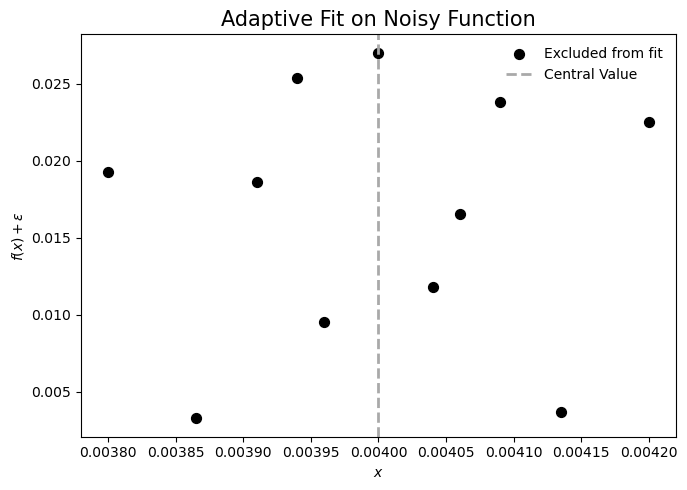

In [5]:
# Define the test function
f = lambda x: np.exp(-x**2) * np.sin(5 * x)
#f = lambda x: np.exp(x**2) * np.sin(5 * x)
x0 = 0.004
noise_std = 0.05  # Standard deviation of noise
trials = 100  # Number of trials for averaging

# Define functions to calculate derivatives of
functions_dict = {
    'linear': lambda x: 2 * x + 3,
    'quadratic': lambda x: x ** 2 - 4 * x + 2,
    'cubic': lambda x: 2 * x + x ** 3,
    'trigonometric': lambda x: np.sin(x),
    'exponential': lambda x: np.exp(x),
    'logarithmic': lambda x: np.log(x + 1) if x > 0 else 0  # Avoid log(0)
}


blowup_functions = {
    "inv_x": lambda x: 1 / x,  # singular at x = 0
    "inv_x_squared_plus_eps": lambda x: 1 / (x**2 + 1e-6),  # sharp peak near 0
    "exp_x_squared_sin": lambda x: np.exp(x**2) * np.sin(5 * x),  # rapid growth + oscillation
    "exp_inv_x_squared": lambda x: np.exp(1 / (x**2 + 1e-6)),  # extreme blow-up at 0
    "log_x": lambda x: np.log(x),  # undefined for x <= 0
    "tan_x": lambda x: np.tan(x),  # vertical asymptotes at pi/2 + n*pi
    "x_pow_x": lambda x: x**x if x > 0 else 0,  # non-analytic at 0
    "sin_1_over_x": lambda x: np.sin(1 / x) if x != 0 else 0,  # wild oscillations near 0
    "sqrt_abs_x": lambda x: np.sqrt(abs(x)),  # non-differentiable at 0
    "abs_x": lambda x: abs(x),  # cusp at x = 0
    "step_function": lambda x: 0 if x < 0 else 1,  # discontinuous at 0
}

plotter = DerivativePlotter(function=f, x_center=x0, plot_dir="plots")
stencil_vals = plotter.run_derivative_trials_with_noise(method="finite", noise_std=noise_std, trials=trials)
adaptive_vals = plotter.run_derivative_trials_with_noise(method="adaptive", noise_std=noise_std, trials=trials)
#plotter.plot_histograms(stencil_vals, adaptive_vals)
plotter.demonstrate_adaptive_fit()

In [ ]:
from derivkit.adaptive_fittesting import AdaptiveFitDerivative

x0_dict = {
    "inv_x": 1.0,
    "inv_x_squared_plus_eps": 0.1,
    "exp_x_squared_sin": 0.5,
    "exp_inv_x_squared": 0.2,
    "log_x": 1.0,
    "tan_x": 0.4,
    "x_pow_x": 0.5,
    "sin_1_over_x": 0.1,
    "sqrt_abs_x": 0.2,
    "abs_x": 0.3,
    "step_function": 0.3,
}

results = {}

for name, func in blowup_functions.items():
    x0 = x0_dict[name]
    print(f"Running: {name} at x0 = {x0}")

    try:
        deriv = AdaptiveFitDerivative(func, x0, derivative_order=1, debug=True)
        val = deriv.compute(
            include_zero=False,
            fit_tolerance=0.1,
            weighted_fit=True,
            clip_y_max=1e3,
            use_fallback=False,
            auto_tune_tolerance=True,
        )
        results[name] = val
    except Exception as e:
        results[name] = f"Error: {e}"

for k, v in results.items():
    print(f"{k}: {v}")


In [11]:
plotters = {}

x0 = 0.05  # Central value for derivative
noise_std = 0.001  # Standard deviation of noise
trials = 100  # Number of trials for averaging

functions_dict = {
    'linear': lambda x: 2 * x + 3,
    'quadratic': lambda x: x ** 2 - 4 * x + 2,
    'cubic': lambda x: 2 * x + x ** 3,
    'trigonometric': lambda x: np.sin(x),
    'exponential': lambda x: np.exp(x),
    'logarithmic': lambda x: np.log(x + 1) if x > -1 else 0  # Avoid log domain error
}

for name, func in functions_dict.items():
    print(f"Processing: {name}")
    plotter = DerivativePlotter(function=func, x_center=x0, plot_dir=f"plots")
    plotters[name] = plotter  # Save the instance

    stencil_vals = plotter.run_derivative_trials_with_noise(method="finite", noise_std=noise_std, trials=trials)
    adaptive_vals = plotter.run_derivative_trials_with_noise(method="adaptive", noise_std=noise_std, trials=trials)

    #plotter.plot_histograms(stencil_vals, adaptive_vals)


Processing: linear
Processing: quadratic
Processing: cubic
Processing: trigonometric
Processing: exponential
Processing: logarithmic


Processing: linear


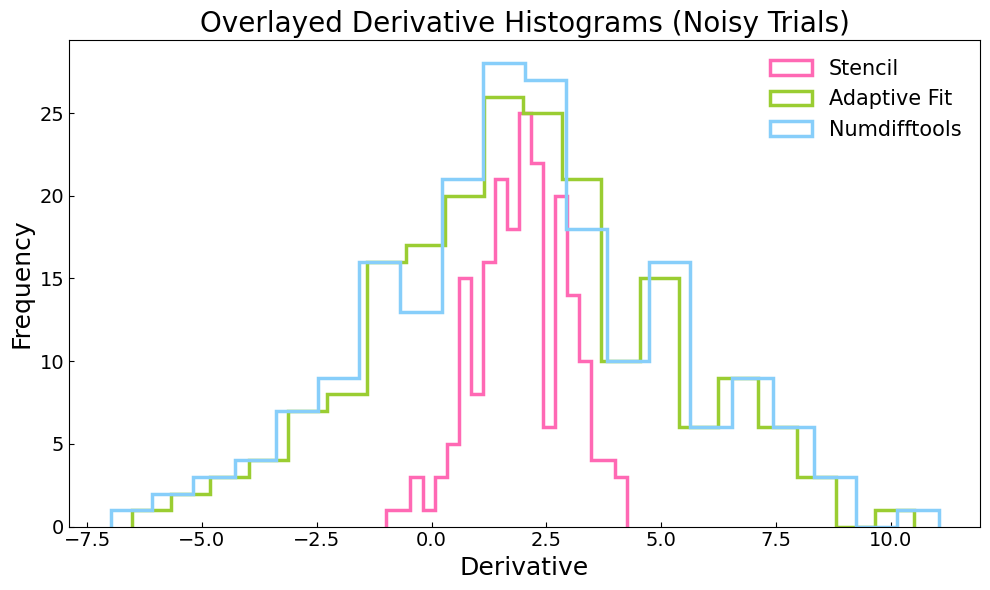

Processing: quadratic


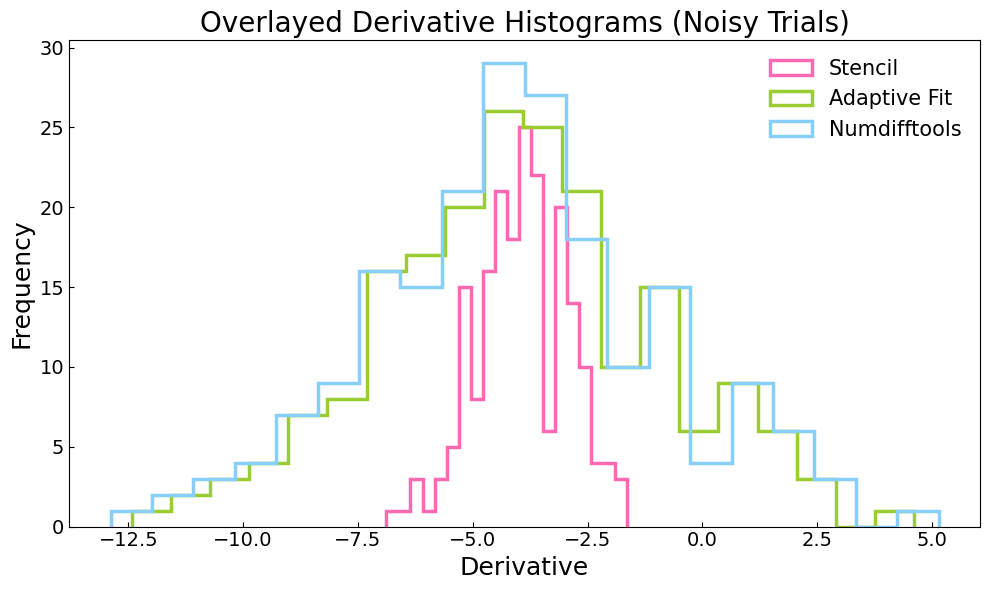

Processing: cubic


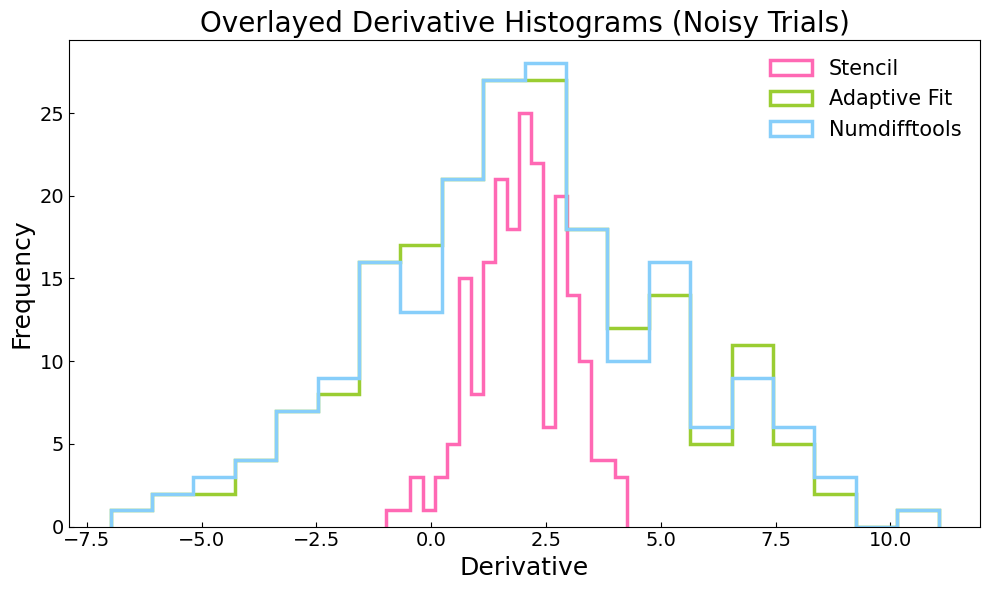

Processing: trigonometric


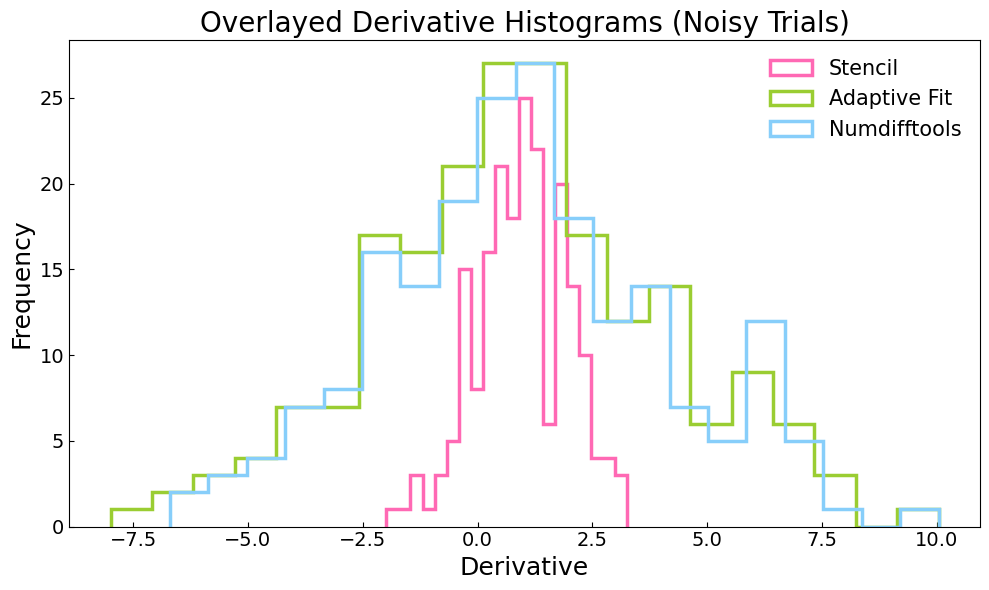

Processing: exponential


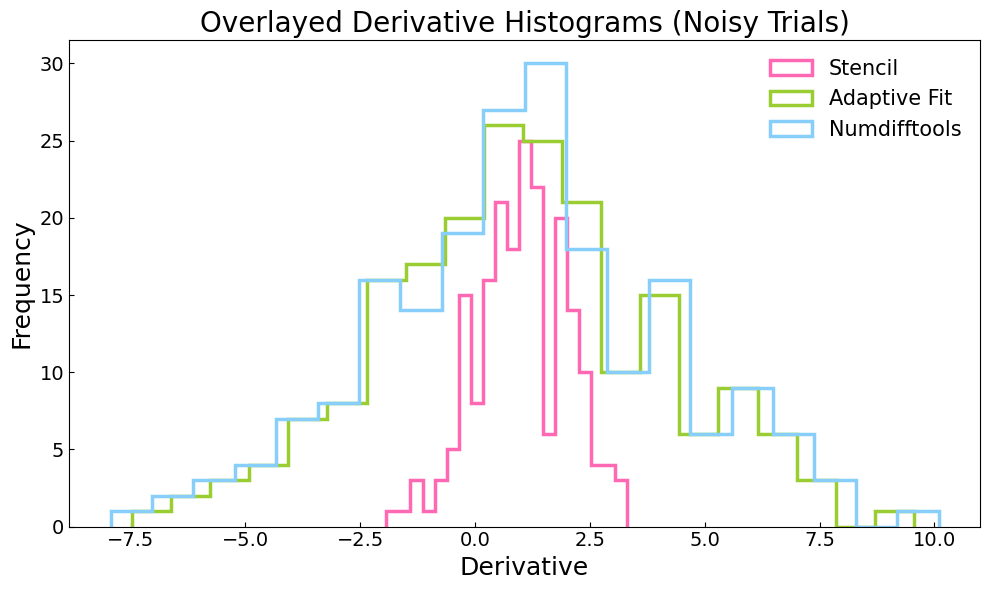

Processing: logarithmic


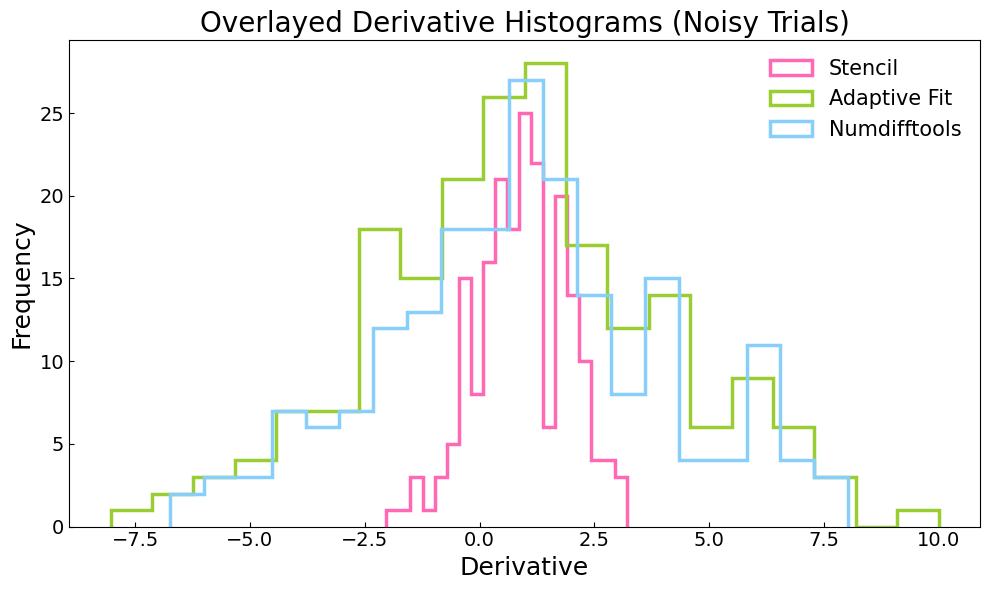

In [9]:
plotters = {}

for name, func in functions_dict.items():
    print(f"Processing: {name}")
    plotter = DerivativePlotter(function=func, x_center=x0, plot_dir=f"plots")
    plotters[name] = plotter  # Save the instance

    plotter.plot_overlaid_histograms(noise_std=noise_std, trials=200, bins=20)


Showing adaptive fit for: linear
im so done with this shit aaa


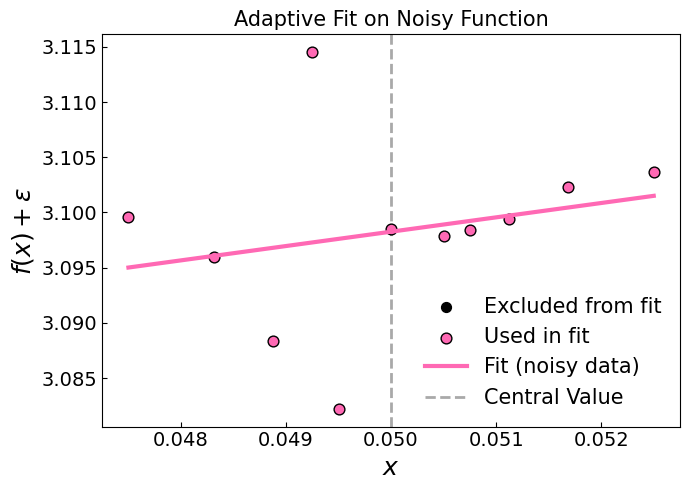

Showing adaptive fit for: quadratic
im so done with this shit aaa


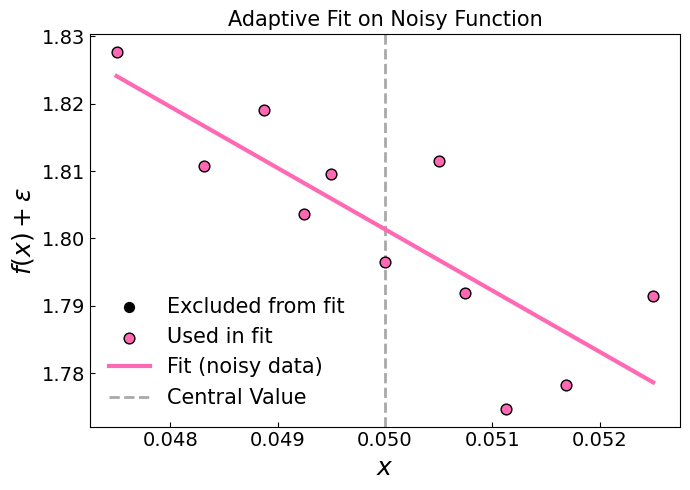

Showing adaptive fit for: cubic
[WARNING] Only 0 point(s) used — skipping fit.
im so done with this shit aaa


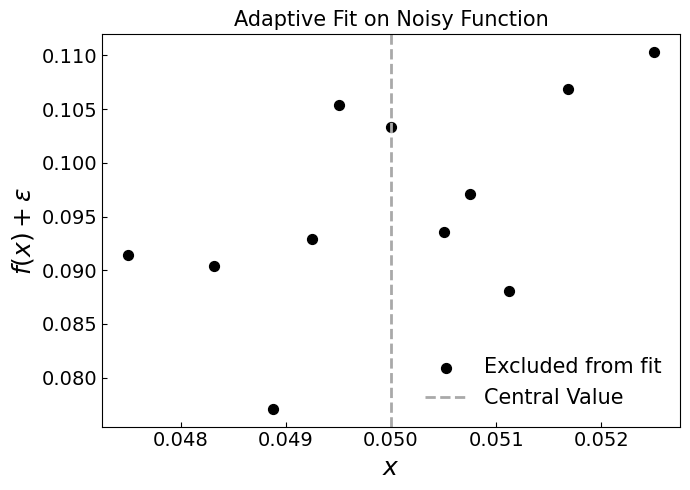

Showing adaptive fit for: trigonometric
[WARNING] Only 0 point(s) used — skipping fit.
im so done with this shit aaa


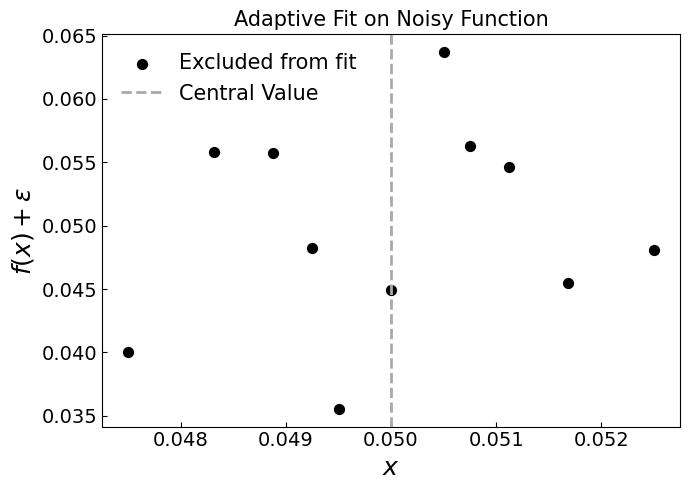

Showing adaptive fit for: exponential
im so done with this shit aaa


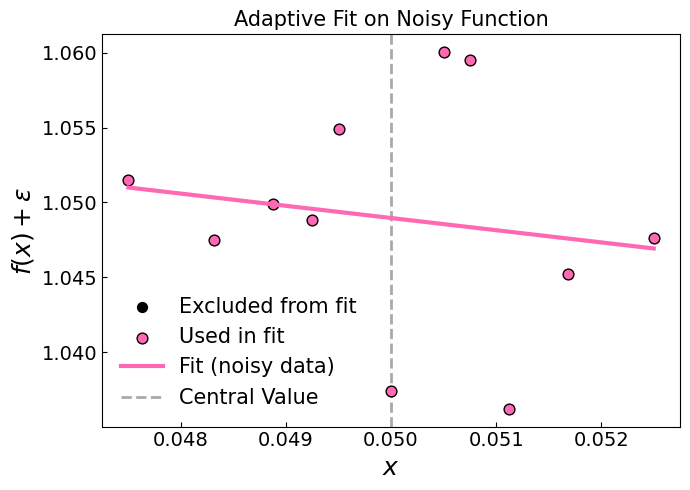

Showing adaptive fit for: logarithmic
[WARNING] Only 0 point(s) used — skipping fit.
im so done with this shit aaa


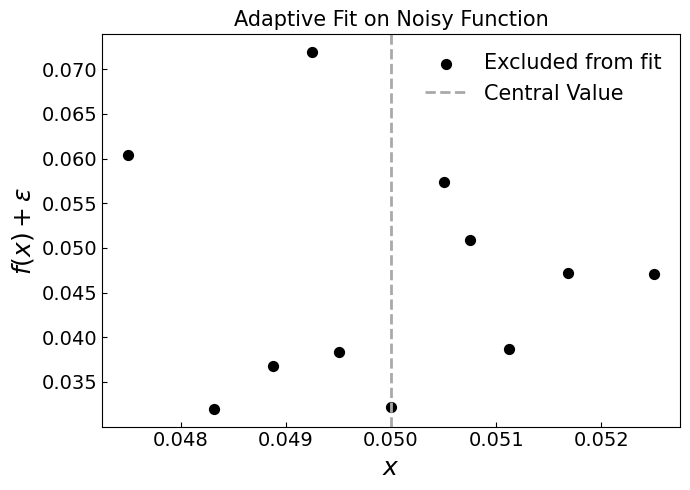

In [12]:
for name, plotter in plotters.items():
    print(f"Showing adaptive fit for: {name}")
    plotter.demonstrate_adaptive_fit()


In [ ]:
for name, plotter in plotters.items():
    print(f"Generating boxplot comparison for: {name}")
    plotter.plot_box_comparison(iterations=100, noise_std=0.02)


In [ ]:
# Cell 5: Error vs noise level

noise_levels = np.linspace(0.001, 0.05, 10)
trials = 100  # Number of trials for averaging

for name, plotter in plotters.items():
    print(f"Plotting error vs noise level for: {name}")
    plotter.plot_error_vs_noise(noise_levels=noise_levels, trials=trials)


In [ ]:
# Cell 6: Bias-variance tradeoff

for name, plotter in plotters.items():
    print(f"Plotting bias-variance tradeoff for: {name}")
    plotter.plot_bias_variance_tradeoff(noise_std=0.02, trials=100)


In [ ]:
# Cell 7: Error across domain (absolute and relative)

for name, plotter in plotters.items():
    print(f"Plotting error across domain for: {name}")
    plotter.plot_relative_and_absolute_errors(x_min=0.3, x_max=0.7, num=100)
